# Machine Learning - PreProcessing
This notebook prepares the data for an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [41]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [42]:
# Get the stock data using yahoo source
df = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-26')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672
...,...,...,...,...,...,...
2021-01-20,132.490005,128.550003,128.660004,132.029999,104319500.0,132.029999
2021-01-21,139.669998,133.589996,133.800003,136.869995,120529500.0,136.869995
2021-01-22,139.850006,135.020004,136.279999,139.070007,113907200.0,139.070007


In [43]:
# Get the number of rows and columns in the data set
df.shape

(1275, 6)

<function matplotlib.pyplot.show(*args, **kw)>

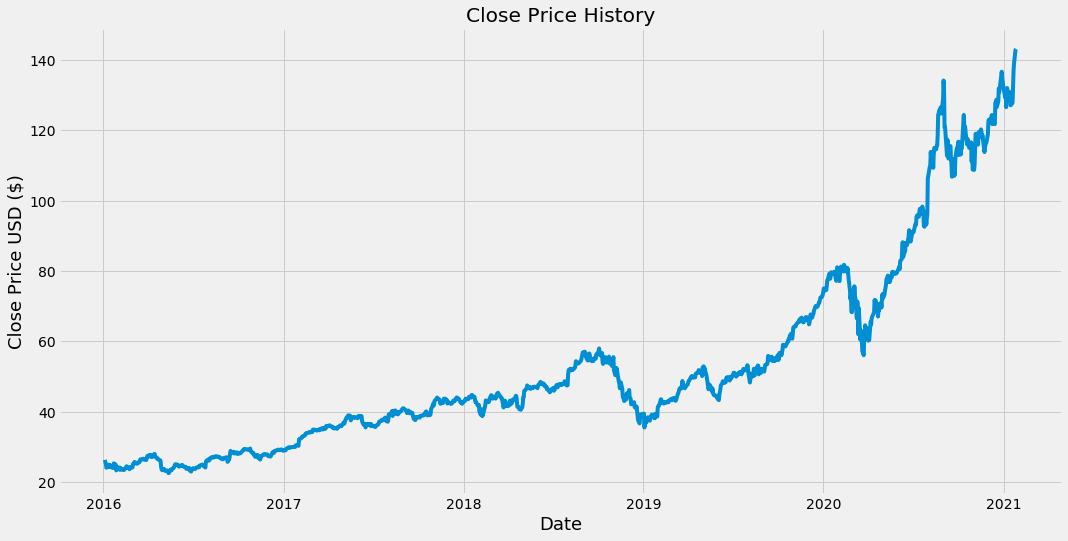

In [44]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [45]:
# Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1020

In [46]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03112171],
       [0.02564794],
       [0.02148041],
       ...,
       [0.96607924],
       [0.99800949],
       [1.        ]])

In [47]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03112171, 0.02564794, 0.02148041, 0.01266846, 0.0137259 ,
       0.01698114, 0.0199461 , 0.01461746, 0.0190338 , 0.01407838,
       0.01310389, 0.01337343, 0.01235747, 0.02297326, 0.01886794,
       0.0200083 , 0.00638607, 0.00777524, 0.01451379, 0.012627  ,
       0.00858388, 0.01246113, 0.01297948, 0.00763011, 0.00968278,
       0.0096413 , 0.00814846, 0.00696662, 0.00756791, 0.01306242,
       0.01613105, 0.01227453, 0.01181838, 0.01356003, 0.00901929,
       0.01194278, 0.01331123, 0.01362224, 0.01316609, 0.02112793,
       0.02158408, 0.02313913, 0.02626997, 0.02390629, 0.02216463,
       0.02235125, 0.02245491, 0.02471492, 0.02525399, 0.0295252 ,
       0.03240722, 0.03205475, 0.03230355, 0.03228283, 0.03396227,
       0.03273896, 0.0317852 , 0.03078998, 0.03595273, 0.03985072])]
[0.038668879987208304]

[array([0.03112171, 0.02564794, 0.02148041, 0.01266846, 0.0137259 ,
       0.01698114, 0.0199461 , 0.01461746, 0.0190338 , 0.01407838,
       0.01310389, 0.01337343, 0.0

In [48]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
# Reshape the data
x_train.shape

(960, 60)

In [50]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(960, 60, 1)

In [51]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
960/960 [==============================] - 90s 83ms/step - loss: 0.0015
Epoch 2/6
960/960 [==============================] - 77s 80ms/step - loss: 2.6722e-04
Epoch 3/6
960/960 [==============================] - 83s 86ms/step - loss: 2.0169e-04
Epoch 4/6
960/960 [==============================] - 55s 58ms/step - loss: 1.4200e-04
Epoch 5/6
960/960 [==============================] - 42s 44ms/step - loss: 1.0510e-04
Epoch 6/6
960/960 [==============================] - 72s 74ms/step - loss: 9.4830e-05


In [54]:
# Create the testing data set
# Create a new array containing scaled values from index 1266 to 953
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [55]:
# Conver the data to a numpy array
x_test = np.array(x_test)

In [56]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [58]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.3262504428040748

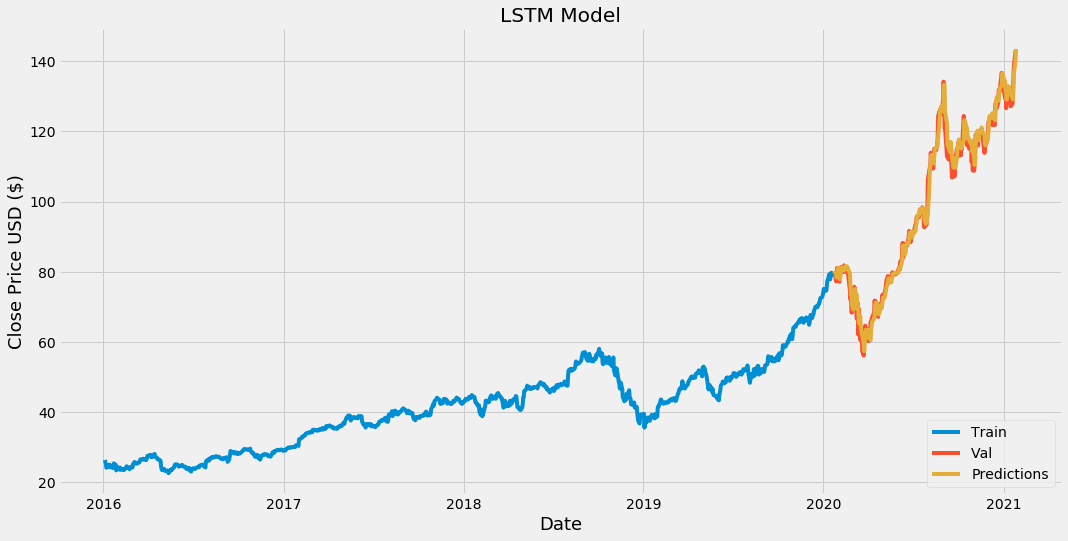

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-23,79.807503,79.445686
2020-01-24,79.577499,79.743240
2020-01-27,77.237503,79.752174
2020-01-28,79.422501,78.318459
2020-01-29,81.084999,78.922134
...,...,...
2021-01-20,132.029999,129.137497
2021-01-21,136.869995,132.128311
2021-01-22,139.070007,136.794998


In [61]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-27')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[144.64073]]
